Text(0.5, 0, 'Cumulative Distribution')

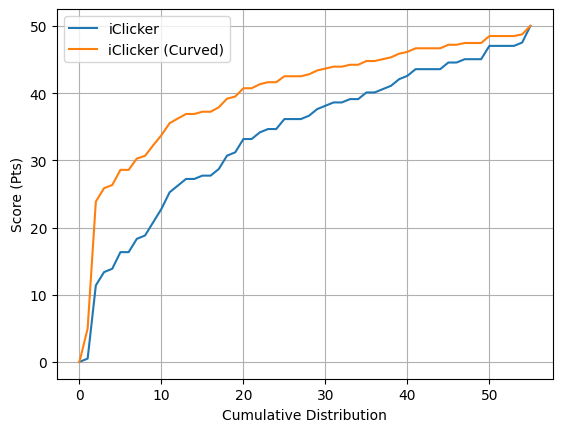

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
gb_pth = "C:\\Users\\User\\Downloads\\2024-04-18T0947_Grades-GEOS_300_201_2023W2.csv"
gb = pd.read_csv(gb_pth,skiprows=[1,2])
gb['iClicker'] = (gb['iClicker Grade (1824139)']/gb['iClicker Grade (1824139)'].max())
gb['iClicker (Curved)'] = (gb['iClicker']**.5)*50

temp = gb['iClicker'].sort_values().reset_index().drop('index',axis=1)
temp['iClicker (Curved)'] = temp**.5
temp = temp*50
fig,ax=plt.subplots()
temp.plot(ax=ax)
ax.grid()
ax.set_ylabel('Score (Pts)')
ax.set_xlabel('Cumulative Distribution')

,Assignment 1 (1785593),Assignment 2 (1795243),Assignment 3 (1806314),Assignment 4 (1818012)
count,54.000000,55.000000,55.000000,0.0
mean,69.208333,75.581818,76.754545,NaN
std,29.196139,28.125177,25.950785,NaN
min,0.000000,0.000000,0.000000,NaN
25%,70.250000,74.000000,74.500000,NaN
50%,80.375000,87.000000,86.000000,NaN
75%,88.125000,91.500000,93.000000,NaN
max,99.500000,99.000000,98.500000,NaN


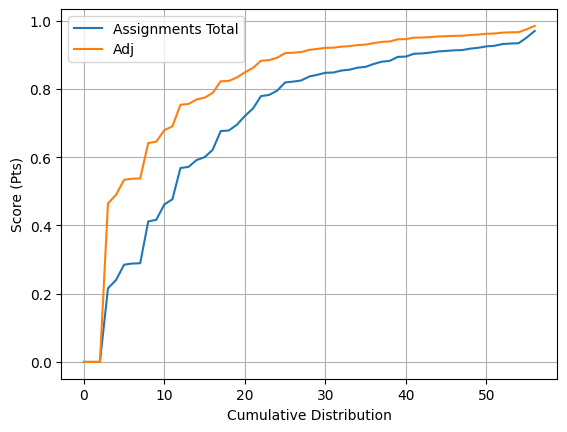

In [43]:
gb['Assignments Total'] = gb[['Assignment 1 (1785593)',
                    'Assignment 2 (1795243)',
                    'Assignment 3 (1806314)',
                    'Assignment 4 (1818012)']].sum(axis=1)

temp = gb['Assignments Total'].sort_values().reset_index().drop('index',axis=1)/300
temp['Adj'] = (temp)**.5
fig,ax=plt.subplots()
temp.plot(ax=ax)
ax.grid()
ax.set_ylabel('Score (Pts)')
ax.set_xlabel('Cumulative Distribution')

gb[['Assignment 1 (1785593)',
        'Assignment 2 (1795243)',
        'Assignment 3 (1806314)',
        'Assignment 4 (1818012)']].describe()

Text(0.5, 0, 'Cumulative Distribution')

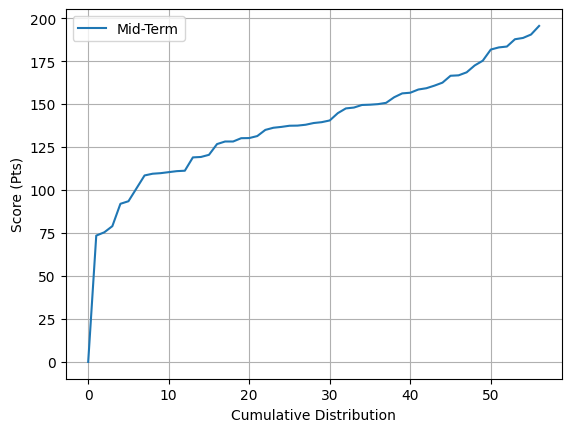

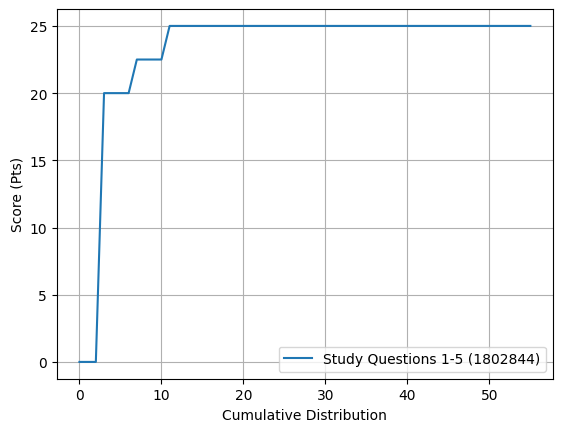

In [44]:
gb['Mid-Term'] = gb[['Mid-Term Exam Part 1 (1806245)', 'Mid-Term Exam Part 2 (1806273)']].sum(axis=1)

temp = gb['Mid-Term'].sort_values().reset_index().drop('index',axis=1)
fig,ax=plt.subplots()
temp.plot(ax=ax)
ax.grid()
ax.set_ylabel('Score (Pts)')
ax.set_xlabel('Cumulative Distribution')


temp = gb['Study Questions 1-5 (1802844)'].sort_values().reset_index().drop('index',axis=1)
fig,ax=plt.subplots()
temp.plot(ax=ax)
ax.grid()
ax.set_ylabel('Score (Pts)')
ax.set_xlabel('Cumulative Distribution')

In [45]:
Total = ((gb['Assignments Total']+gb['iClicker (Curved)']+gb['Mid-Term']+gb['Study Questions 1-5 (1802844)'])/(300+50+200+25)).sort_values()
Total = np.ceil(Total*100)
Total.loc[Total>=.8].count()
bins = [0,49.5,54.5,68.5,79.5,100]
print(Total.groupby(pd.cut(Total,bins)).count())
Total

(0.0, 49.5]       4
(49.5, 54.5]      6
(54.5, 68.5]      8
(68.5, 79.5]      8
(79.5, 100.0]    29
dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_18492\998037870.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(Total.groupby(pd.cut(Total,bins)).count())


15    25.0
1     36.0
9     38.0
16    39.0
13    50.0
42    50.0
18    50.0
11    50.0
39    53.0
0     54.0
8     55.0
40    62.0
50    62.0
31    62.0
45    68.0
21    68.0
12    68.0
22    68.0
3     74.0
54    75.0
30    75.0
27    77.0
38    77.0
17    78.0
24    79.0
49    79.0
32    80.0
46    80.0
43    80.0
23    80.0
41    81.0
47    81.0
48    82.0
14    83.0
7     83.0
5     83.0
37    84.0
33    84.0
20    84.0
34    85.0
19    86.0
6     87.0
35    87.0
10    87.0
28    89.0
52    90.0
4     90.0
25    91.0
26    91.0
2     94.0
53    94.0
44    94.0
51    94.0
55    94.0
29    95.0
36     NaN
56     NaN
dtype: float64

In [51]:
gb['Student Number']=gb['Student Number'].fillna(0).astype('int')
gb['Lecture']=gb['Lecture'].fillna(201).astype('int')
gb.fillna(0).to_csv('C:\\Users\\User\\Downloads\\GB_Updated.csv',index=False)
# gb['iClicker (Curved)']